# Machine Learning Algorithms:

## Regression: Titanic Dataset

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
from __future__ import absolute_import, division, print_function, unicode_literals
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf

In [52]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


### Data representation

Age distribution:


<AxesSubplot:>

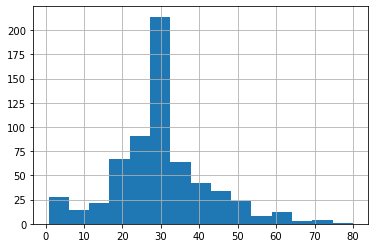

In [14]:
print('Age distribution:')
dftrain['age'].hist(bins=15)

<AxesSubplot:title={'center':'Classes'}, ylabel='class'>

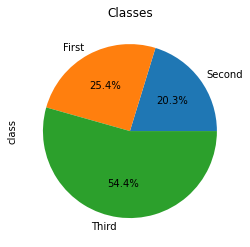

In [15]:
dftrain['class'].value_counts(ascending=True).plot(title='Classes', kind='pie', autopct='%1.1f%%')

<AxesSubplot:>

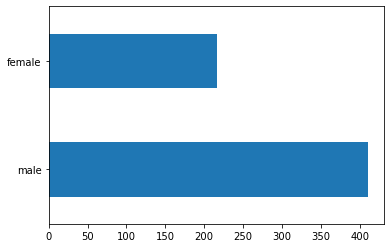

In [16]:
dftrain['sex'].value_counts().plot(kind='barh')

### Feature Columns:

In [55]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []

for feature in CATEGORICAL_COLUMNS:
    vocabulary = dftrain[feature].unique()
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature, vocabulary))
    
for feature in NUMERIC_COLUMNS:
    feature_columns.append(tf.feature_column.numeric_column(feature, dtype=tf.float32))


### Training our model:

In [59]:
#input function
def create_input_function(data_df, label_df, epochs=10, shuffle=True, batch_size=32):
    def input_function():  #function that will be returned
        dataset = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  #creates Dataset object with data and label
        
        if shuffle:
            dataset = dataset.shuffle(1000)  #randomizes order of the data
        
        dataset = dataset.batch(batch_size).repeat(epochs)  #dateset is split into batch_size and process is repeated for number of epochs
        return dataset
    return input_function  #return inner function as function object

train_input_function = create_input_function(dftrain, y_train)
eval_input_function = create_input_function(dfeval, y_eval)

In [46]:
#creating the estimator
linear_estimator = tf.estimator.LinearClassifier(feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/vj/45wnfjqd24z4hv2w0vvxnvzr0000gn/T/tmp8ga2t6a_', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7ff62db6d890>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [61]:
#training the model
linear_estimator.train(train_input_function)
result = linear_estimator.evaluate(eval_input_function)

clear_output()
print('Accuracy of estimation:',result['accuracy'])

Accuracy of estimation: 0.7689394


<AxesSubplot:title={'center':'predicted probabilities'}, ylabel='Frequency'>

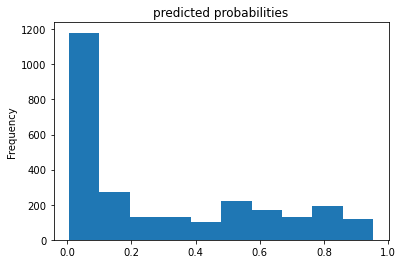

In [70]:
#prediction
prediction = list(linear_estimator.predict(eval_input_function))
probabilities = pd.Series([pred['probabilities'][1] for pred in prediction])
clear_output()
probabilities.plot(kind='hist', title='predicted probabilities')